In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("Downloads/Add_sales_data_2018.csv")

In [9]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


# A textile company regularly spent money on five advertising companies for their ads. 

1. First of all, check whether there is any relationship between the amount
spent for advertising through five different companies and profit
generated.

2. Build a regression model to predict the profit from the given data and
comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the
following amount for advertisement.

Text(0, 0.5, 'Profit(in Thousands)')

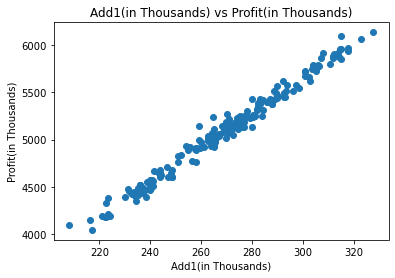

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(data['Add1(in Thousands)'],data['Profit(in Thousands)'])
plt.title('Add1(in Thousands) vs Profit(in Thousands)')
plt.xlabel('Add1(in Thousands)')
plt.ylabel('Profit(in Thousands)')

Text(0, 0.5, 'Profit(in Thousands)')

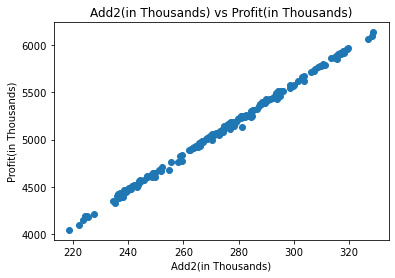

In [33]:
plt.figure(figsize=(6,4))
plt.scatter(data['Add2(in Thousands)'],data['Profit(in Thousands)'])
plt.title('Add2(in Thousands) vs Profit(in Thousands)')
plt.xlabel('Add2(in Thousands)')
plt.ylabel('Profit(in Thousands)')

Text(0, 0.5, 'Profit(in Thousands)')

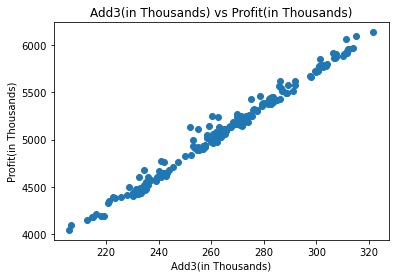

In [35]:
plt.figure(figsize=(6,4))
plt.scatter(data['Add3(in Thousands)'],data['Profit(in Thousands)'])
plt.title('Add3(in Thousands) vs Profit(in Thousands)')
plt.xlabel('Add3(in Thousands)')
plt.ylabel('Profit(in Thousands)')

Text(0, 0.5, 'Profit(in Thousands)')

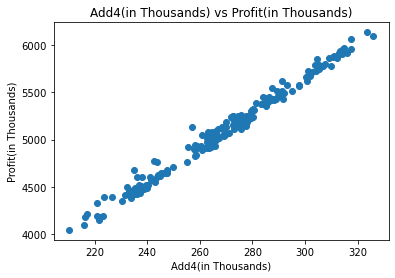

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(data['Add4(in Thousands)'],data['Profit(in Thousands)'])
plt.title('Add4(in Thousands) vs Profit(in Thousands)')
plt.xlabel('Add4(in Thousands)')
plt.ylabel('Profit(in Thousands)')

Text(0, 0.5, 'Profit(in Thousands)')

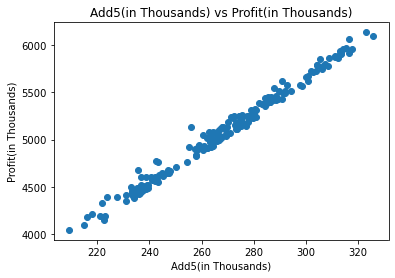

In [36]:
plt.figure(figsize=(6,4))
plt.scatter(data['Add5(in Thousands)'],data['Profit(in Thousands)'])
plt.title('Add5(in Thousands) vs Profit(in Thousands)')
plt.xlabel('Add5(in Thousands)')
plt.ylabel('Profit(in Thousands)')

<AxesSubplot:>

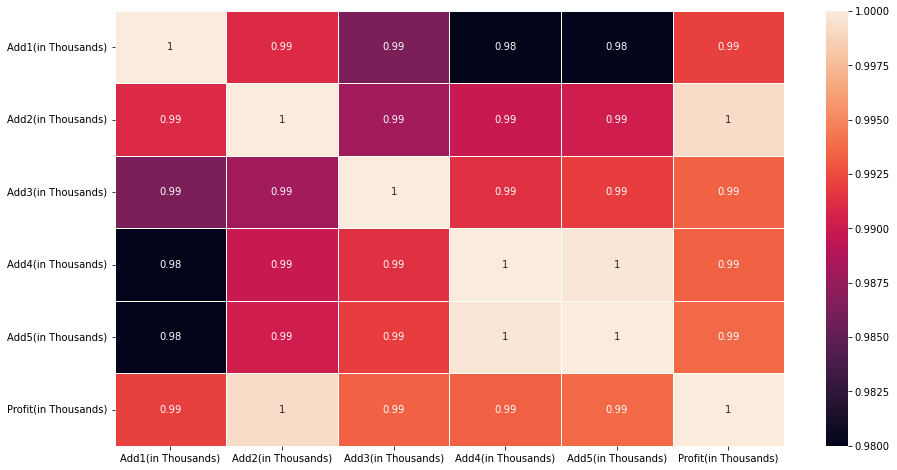

In [39]:
#here we need to find the correlation matrics of each columsn with respect to profit
corrmatrix = data.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corrmatrix,vmin=0.98,vmax=1,annot=True,linewidth=0.8)

In [41]:
data1 = data.drop(['Date','Add5(in Thousands)'],axis=1)
data1.dtypes

Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

In [46]:
y=data1['Profit(in Thousands)']
x=data1.drop(['Profit(in Thousands)'],axis=1)
x.shape

(205, 4)

In [47]:
y.shape

(205,)

In [49]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

from sklearn import linear_model
lr=linear_model.LinearRegression()

model=lr.fit(x_train,y_train)

In [50]:
prediction = model.predict(x_test)
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [51]:
print(prediction)

[4150.88763487 4447.12592965 5133.38031159 4908.26829527 5002.14153915
 4624.18120031 5383.91839828 5328.00021054 5175.58914749 5956.55978675
 5780.89267376 4996.82977447 5076.07968284 5785.53438512 4935.74329169
 5065.84268445 4190.97345105 5034.52167751 5016.93984512 5134.84339471
 5144.92669903 5421.54918213 4569.54364815 4598.61444531 4436.038698
 4176.1770066  5617.3439695  5667.21781797 4648.70261308 5717.90555255
 5002.57699893 5182.40483872 5017.28686642 5544.93173696 5012.72424152
 5028.10954386 5108.59497872 4761.72838332 4607.60239375 4925.98150005
 5249.67337825 5037.90852212 5491.69210158 5020.81890704 4647.66638615
 4486.42826505 4436.03686862 5300.51553142 5425.05225364 4482.17658881
 4192.91620815 6063.57269524]


In [52]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,prediction))

MSE is 0.5381640443754114


In [53]:
table=[['Add1(in Thousands)',290],['Add2(in Thousands)',312],
       ['Add3(in Thousands)',309],['Add4(in Thousands)',298],['Add5(in Thousands)',320]]
table = {'Add1(in Thousands)':[290],'Add2(in Thousands)':[312],'Add3(in Thousands)':[309],'Add4(in Thousands)':[298],'Add5(in Thousands)':[320]}

df=pd.DataFrame(table)
print(df)

   Add1(in Thousands)  Add2(in Thousands)  Add3(in Thousands)  \
0                 290                 312                 309   

   Add4(in Thousands)  Add5(in Thousands)  
0                 298                 320  


In [54]:
df.style.set_table_styles([{'selector': '','props' : [('border', '2px ')]}])

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [57]:
new=[[290,312,309,298]]
new

[[290, 312, 309, 298]]

In [58]:
model.predict(new).item()

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


5801.736693174623